# GMM

In [6]:
!gdown 1TyC3sl4OM-NhmUTcCt4NN8nDZOWHOBrh

Downloading...
From: https://drive.google.com/uc?id=1TyC3sl4OM-NhmUTcCt4NN8nDZOWHOBrh
To: /content/std_df_gmm.pkl
100% 7.19k/7.19k [00:00<00:00, 12.3MB/s]


In [7]:
!gdown 1Z6nMciyzLvw9fdt8ajdNDebkRTbj5FW-

Downloading...
From: https://drive.google.com/uc?id=1Z6nMciyzLvw9fdt8ajdNDebkRTbj5FW-
To: /content/df_gmm.pkl
100% 7.71k/7.71k [00:00<00:00, 15.5MB/s]


In [8]:
import pickle
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [9]:
with open('/content/std_df_gmm.pkl','rb') as f:
    std_df = pickle.load(f)


with open('/content/df_gmm.pkl','rb') as f:
    df = pickle.load(f)

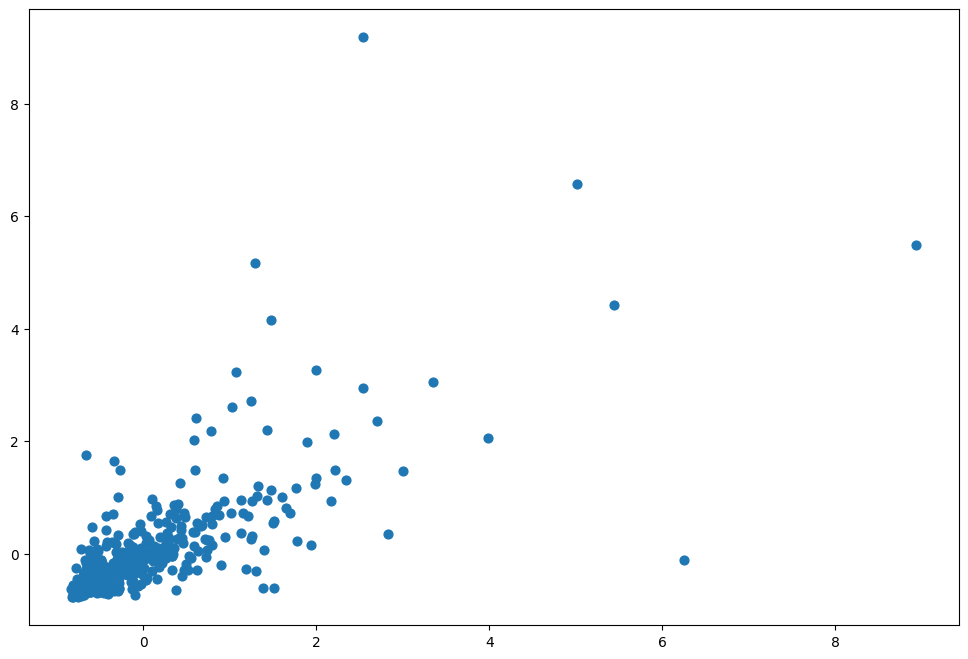

In [56]:
plt.scatter(std_df[:, 0], std_df[:, 1], s=40);

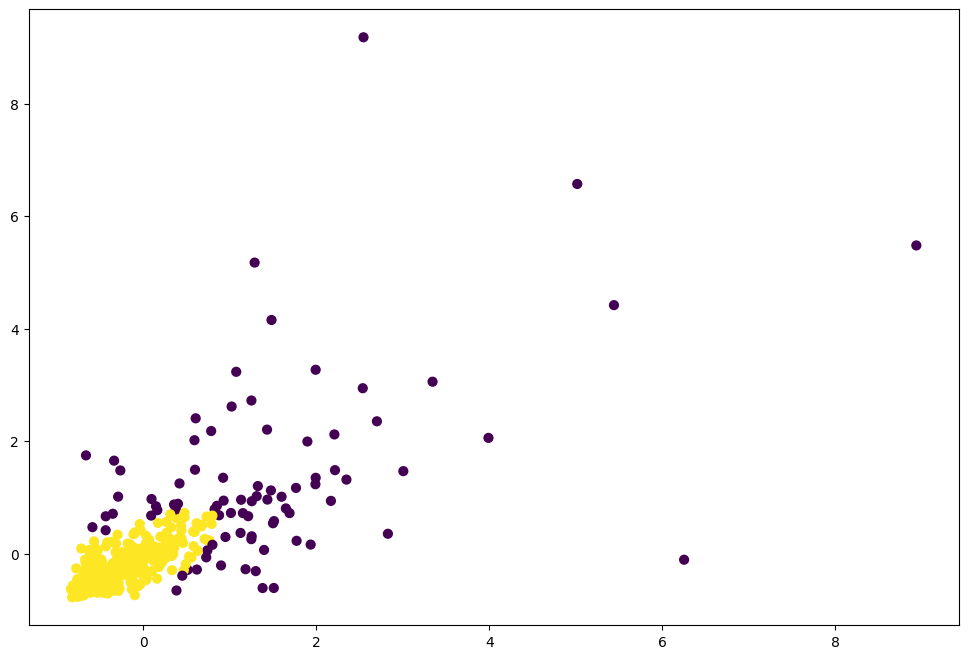

In [58]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(std_df)
labels = gmm.predict(std_df)
plt.scatter(std_df[:, 0], std_df[:, 1], c=labels, s=40, cmap='viridis');

In [69]:
# pd.DataFrame(std_df,columns="clusters"

# DBSCAN


In [70]:
!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL

Downloading...
From: https://drive.google.com/uc?id=10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL
To: /content/wholesaledata.csv
100% 15.0k/15.0k [00:00<00:00, 16.5MB/s]


In [71]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [72]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [73]:
# Dropping categorical variables for simplicity
df.drop(["Channel", "Region"], axis = 1, inplace = True)

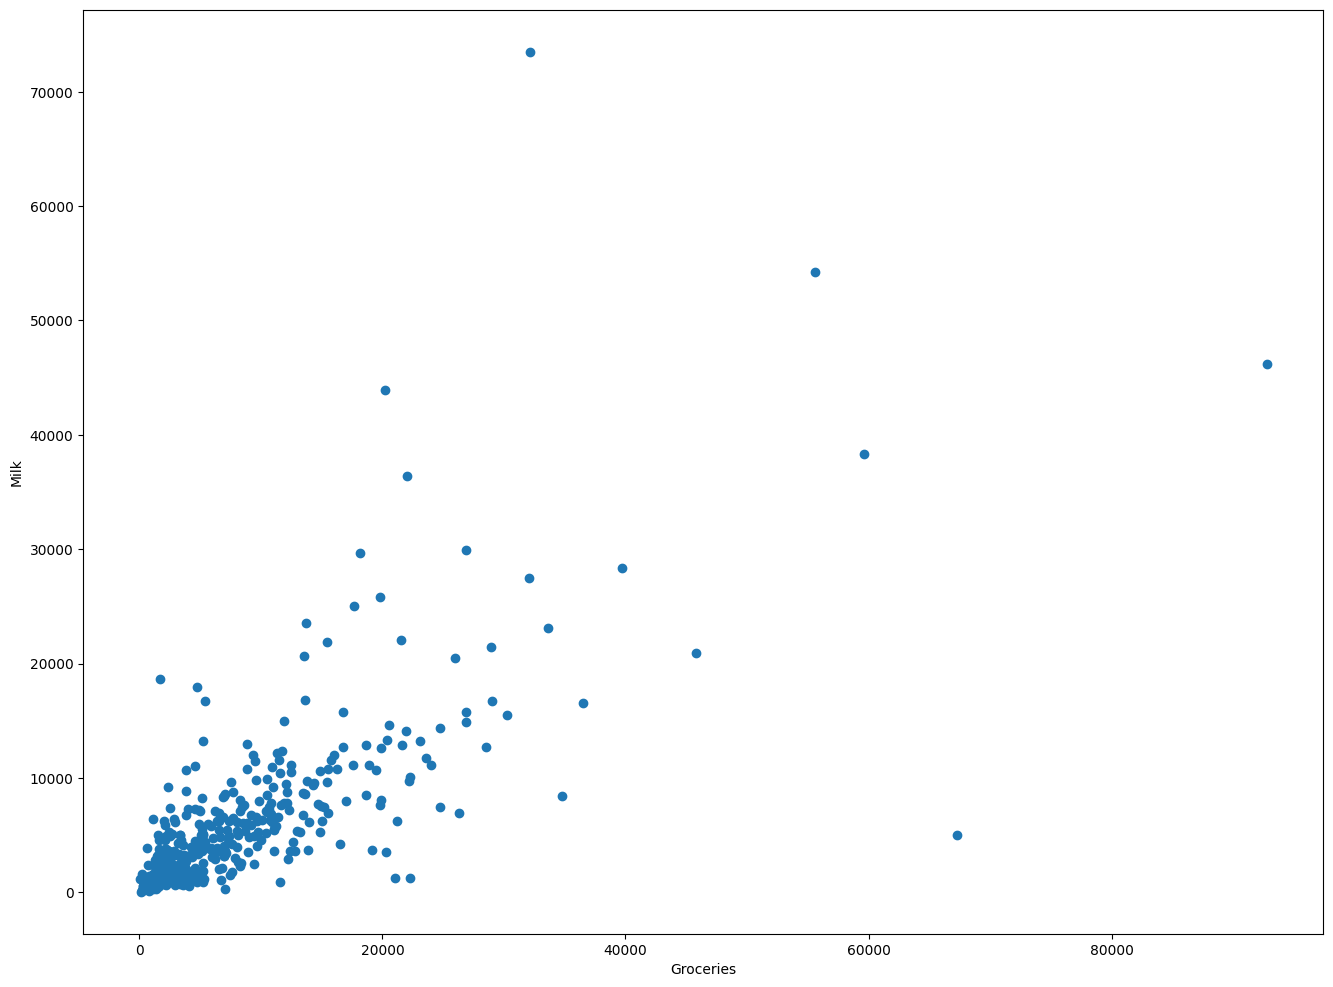

In [74]:
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

In [75]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [76]:
from sklearn.cluster import KMeans

k = 2 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
clusters = df.copy()
clusters['label'] = kmeans.labels_
clusters

Grocery   Milk  label
0       7561   9656      0
1       9568   9810      0
2       7684   8808      0
3       4221   1196      0
4       7198   5410      0
..       ...    ...    ...
435    16027  12051      0
436      764   1431      0
437    30243  15488      1
438     2232   1981      0
439     2510   1698      0

[440 rows x 3 columns]

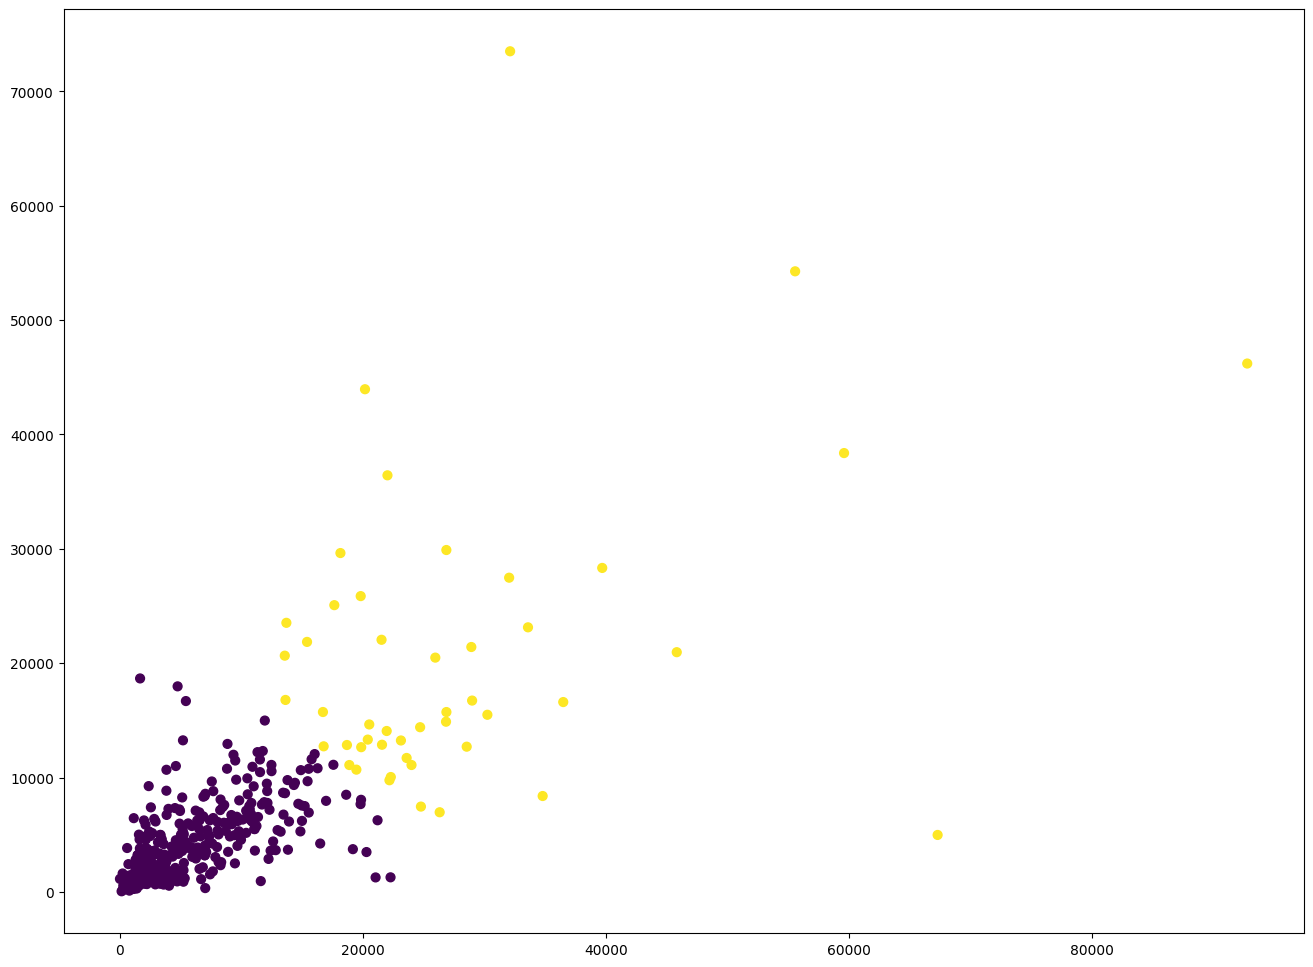

In [78]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

In [79]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agc_pred = agc.fit_predict(std_df)
clusters['agc labels'] = agc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


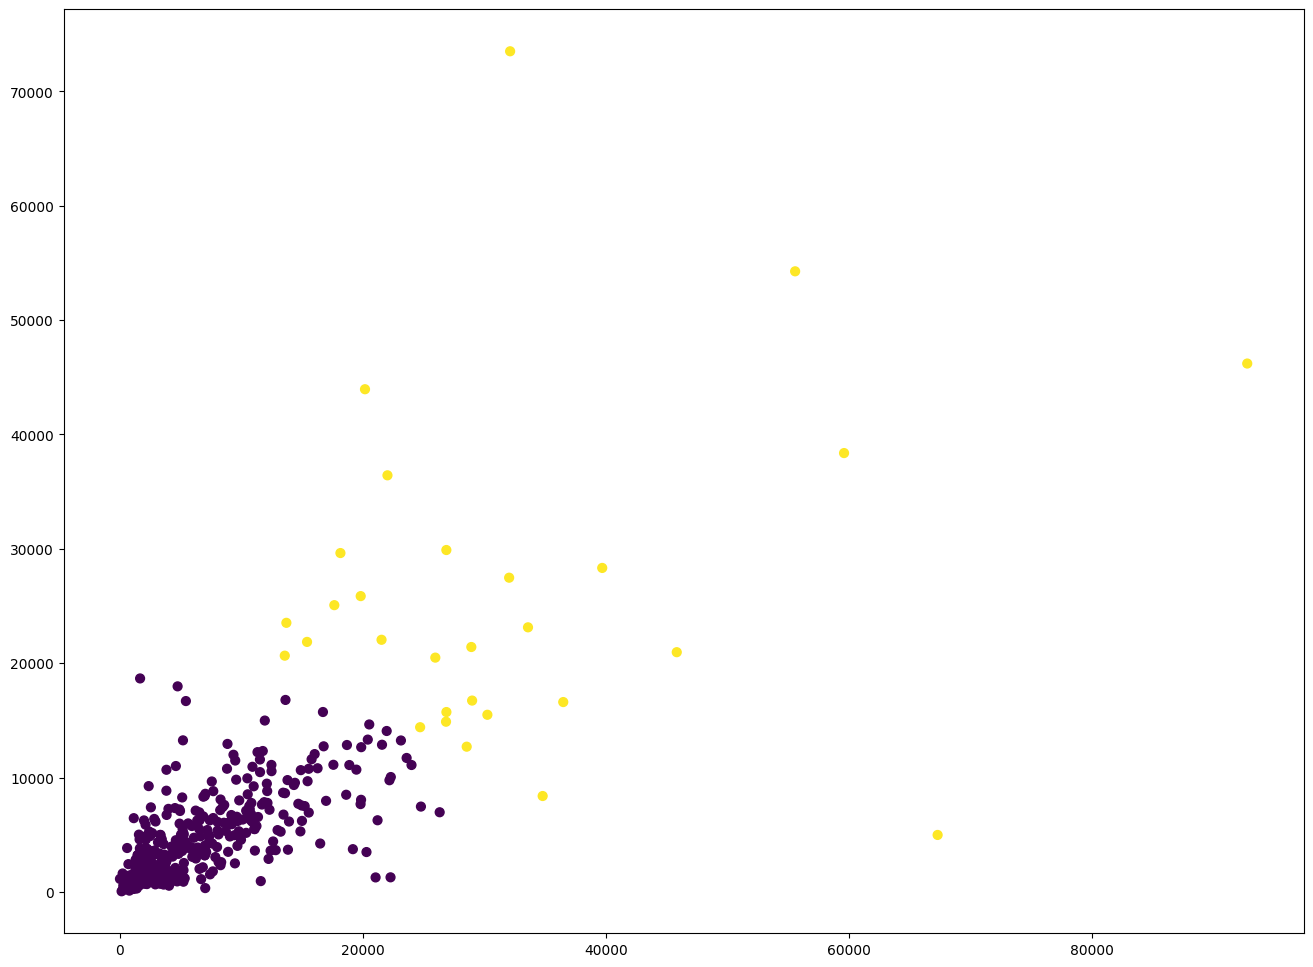

In [80]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['agc labels'])

In [25]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(std_df)

In [27]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [28]:
out_df = df.copy()
out_df['label'] = dbsc.labels_

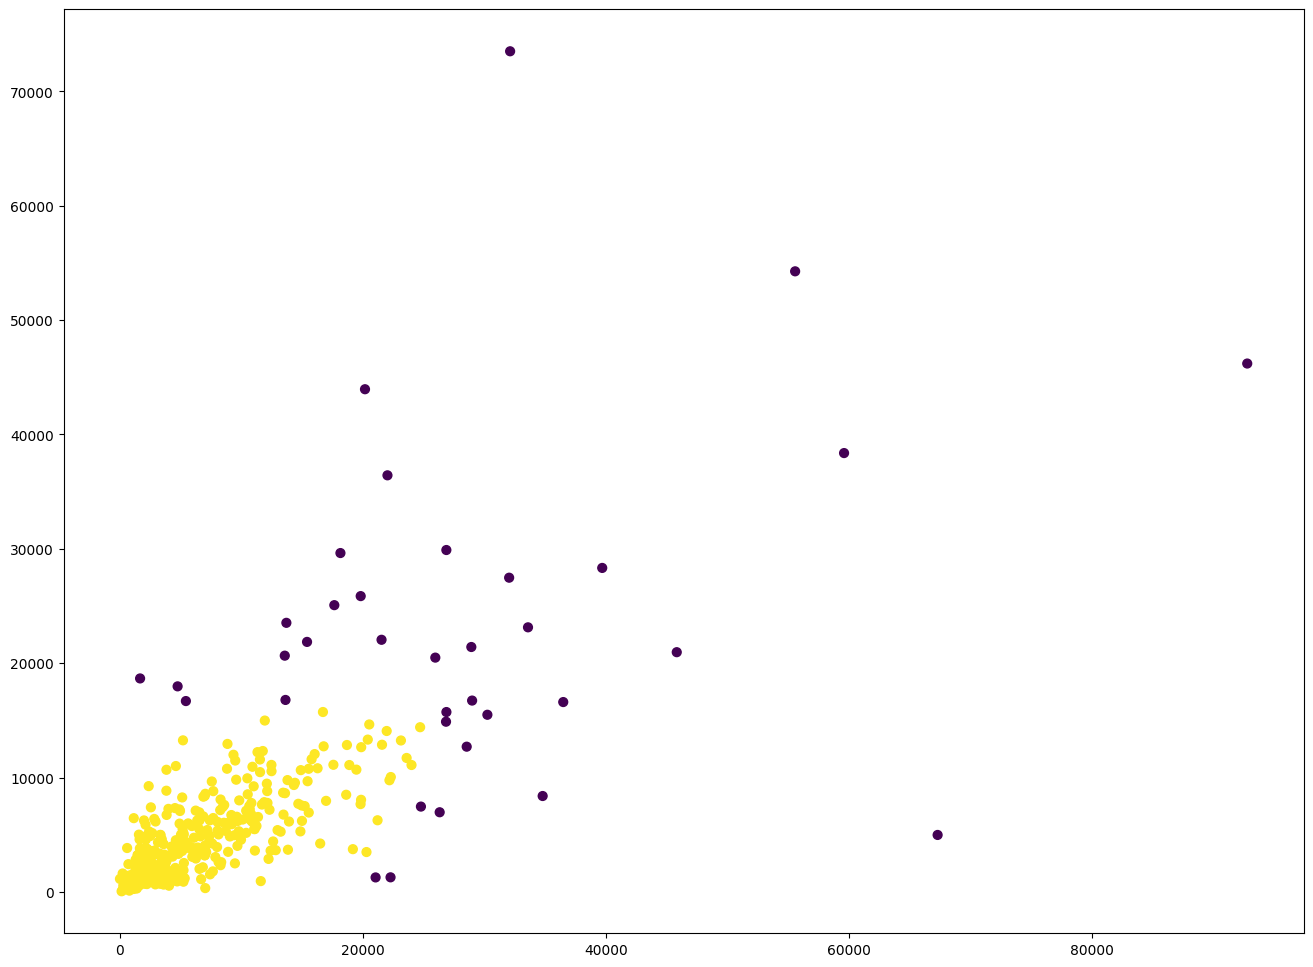

In [29]:
plt.scatter(out_df['Grocery'], out_df['Milk'], s=40, c=out_df['label'])

#### **Comparing with K-Means**

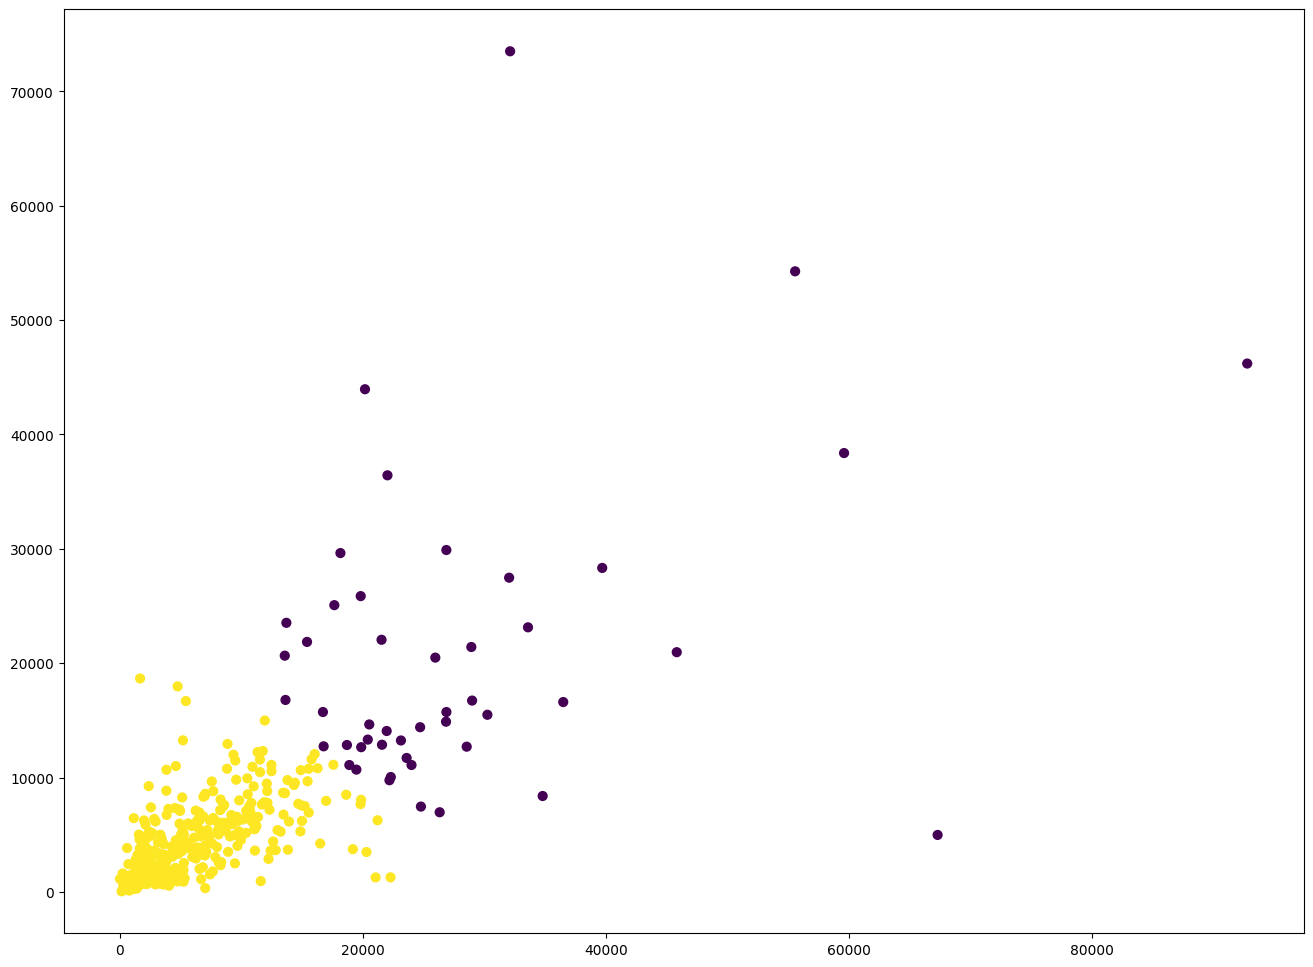

In [30]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

# Anomaly Detection

In [82]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 38.9MB/s]


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [84]:
df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

Mileage      Price
0  54.282388  67.967708
1  17.331911  70.023637
2  36.548113  68.080455
3  42.567541  71.058755
4   5.608853  57.822432

In [85]:
df.describe()

Mileage       Price
count  908.000000  908.000000
mean    45.869736   77.555036
std     30.598219   19.275677
min      1.398964   20.000000
25%     25.415487   64.435773
50%     34.599453   73.550501
75%     49.862529   88.939217
max    128.604249  141.201890

Text(0, 0.5, 'Price')

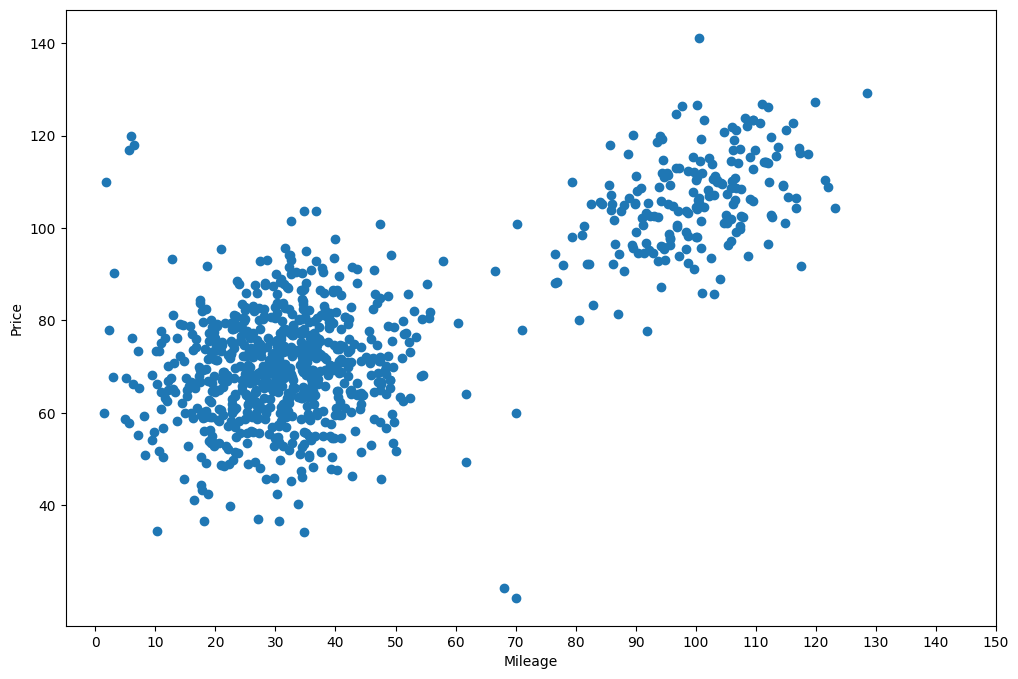

In [86]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')

### Distribution Based

In [87]:
# Elliptic Envelope

In [88]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=0).fit(df)
ee_pred = cov.predict(df)

In [89]:
df['is_outlier_ee'] = ee_pred

In [90]:
cov.predict([[25, 50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


array([1])

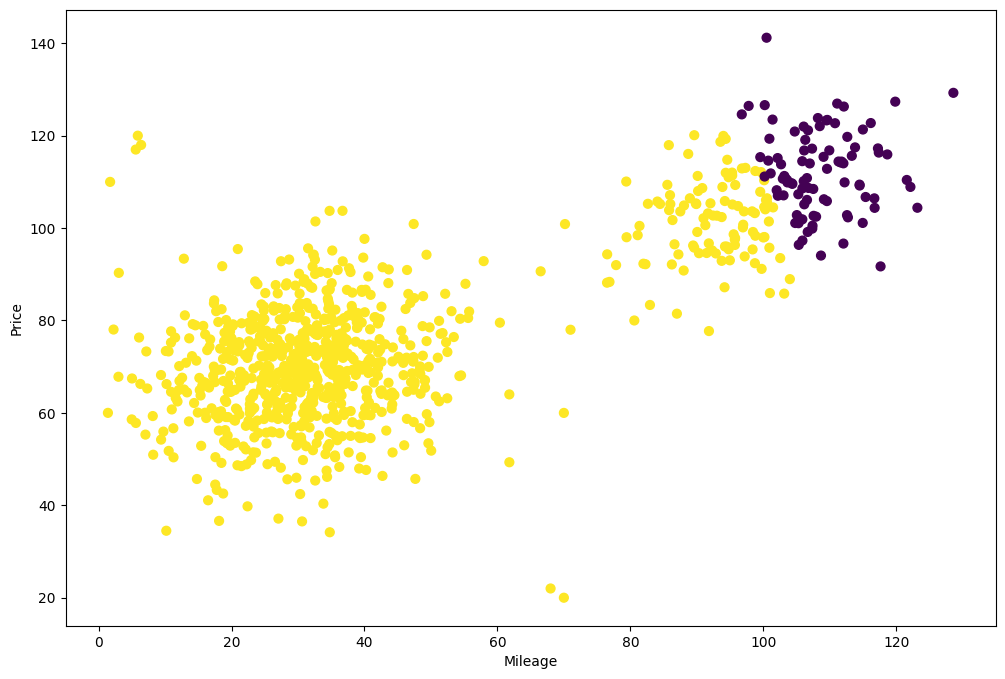

In [91]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

## IsolationForest

In [50]:
from sklearn.ensemble import IsolationForest

In [94]:
# using same data that we used in Elliptical Envelope -----> X
clf = IsolationForest(random_state=0, contamination = 0.02).fit_predict(df.iloc[:, :-1])
df['is_outlier_if'] = clf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


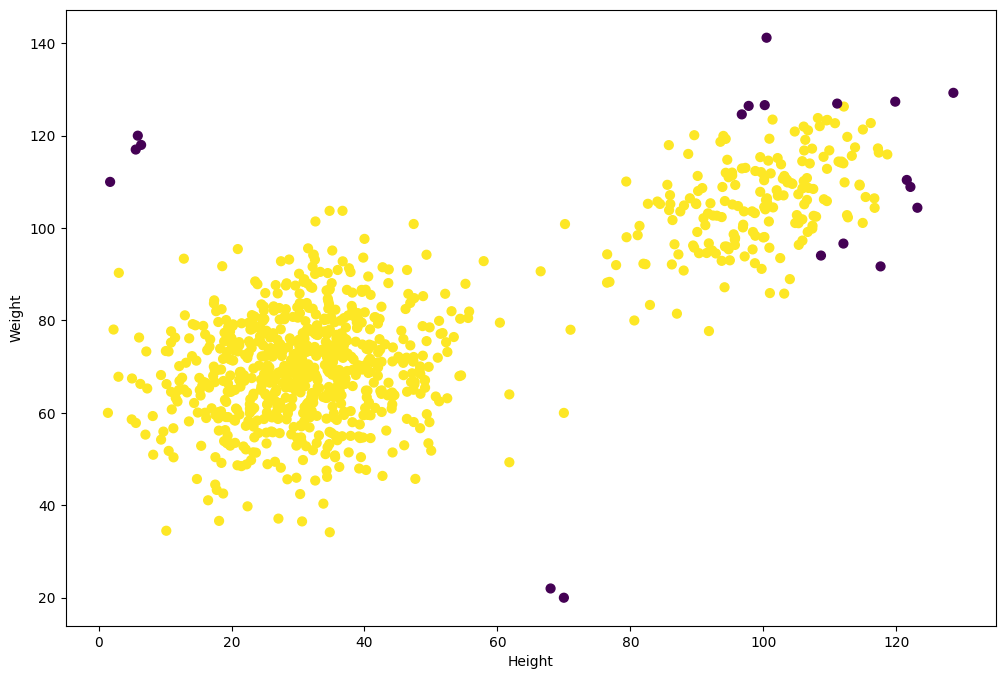

In [95]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## LocalOutlierFactor

In [100]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.10).fit_predict(df.iloc[:, :2])
df['is_outlier_lof'] = clf

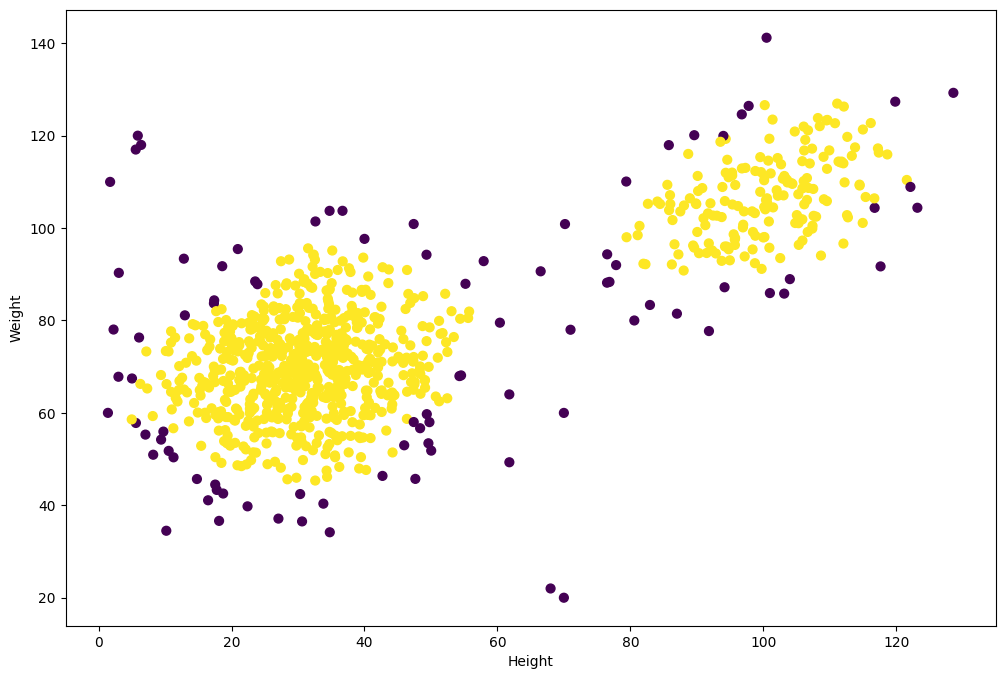

In [101]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()